## Importing the libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load our data

In [54]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [55]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [56]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [57]:
y = y.reshape(len(y), 1)

In [58]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X = ss_X.fit_transform(X)
ss_y = StandardScaler()
y = ss_y.fit_transform(y)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [61]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Fitting our model

In [62]:
y = y.reshape(1, y.shape[0])

In [63]:
y = y[0]

In [64]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Plotting the model

Text(0, 0.5, 'Salary')

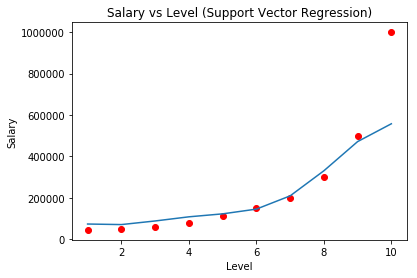

In [72]:
plt.scatter(ss_X.inverse_transform(X), ss_y.inverse_transform(y), color='red')
plt.plot(ss_X.inverse_transform(X), ss_y.inverse_transform(svr.predict(X)))
plt.title('Salary vs Level (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')

## Plotting the model using OOP

Text(0, 0.5, 'Salary')

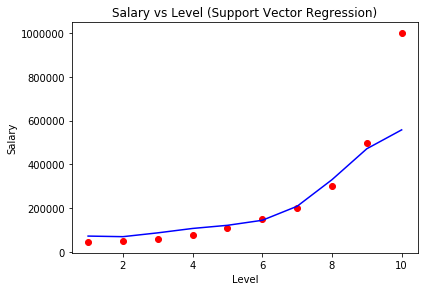

In [82]:
fig = plt.figure()

axes = fig.add_axes([0.0, 0.0, 0.8, 0.8]) # Left, bottom, width, height
axes.scatter(ss_X.inverse_transform(X), ss_y.inverse_transform(y), color='red')
axes.plot(ss_X.inverse_transform(X), ss_y.inverse_transform(svr.predict(X)), color='blue')
axes.set_title('Salary vs Level (Support Vector Regression)')
axes.set_xlabel('Level')
axes.set_ylabel('Salary')

## Predicting a new value

In [90]:
y_pred = ss_y.inverse_transform(svr.predict(ss_X.transform([[6.5]])))

In [91]:
y_pred

array([170370.0204065])

In [92]:
y_pred = ss_y.inverse_transform(svr.predict(X))

In [93]:
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

In [96]:
y = ss_y.inverse_transform(y)

In [98]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y), 1)), axis=1))

[[  73474.16   45000.  ]
 [  70786.95   50000.  ]
 [  88213.01   60000.  ]
 [ 108254.99   80000.  ]
 [ 122574.52  110000.  ]
 [ 145503.11  150000.  ]
 [ 209410.23  200000.  ]
 [ 330606.89  300000.  ]
 [ 471671.96  500000.  ]
 [ 557821.76 1000000.  ]]
